In [5]:
import pandas as pd
import torch
import numpy as np
import pickle

In [6]:
!ls *.pickle

test_results.pickle  training_loss.pickle


In [7]:
with open('test_results.pickle','rb') as f:
    test_results=pickle.load(f)

In [8]:
with open('training_loss.pickle','rb') as f:
    training_loss=pickle.load(f)

In [9]:
df = {}
for c in test_results.keys():
    df.update({(c, seq_len):pd.DataFrame.from_dict(test_results[c][seq_len], orient='index') for seq_len in test_results[c].keys()})


In [10]:
training_loss_df = {}
for c in training_loss.keys():
    training_loss_df.update({(c, seq_len):pd.DataFrame.from_dict(training_loss[c][seq_len], orient='columns') for seq_len in training_loss[c].keys()})

training_loss_df

{(50,
  5):            0
 0   0.698025
 1   0.696512
 2   0.695111
 3   0.694768
 4   0.694364
 ..       ...
 95  0.661364
 96  0.663632
 97  0.662932
 98  0.665146
 99  0.663925
 
 [100 rows x 1 columns],
 (50,
  7):            0
 0   0.697992
 1   0.695980
 2   0.694531
 3   0.694335
 4   0.694318
 ..       ...
 95  0.665450
 96  0.666089
 97  0.664461
 98  0.663674
 99  0.664153
 
 [100 rows x 1 columns],
 (50,
  10):            0
 0   0.697136
 1   0.695622
 2   0.695263
 3   0.694096
 4   0.694230
 ..       ...
 95  0.693228
 96  0.693196
 97  0.693246
 98  0.693249
 99  0.693281
 
 [100 rows x 1 columns],
 (100,
  5):            0
 0   0.700093
 1   0.698351
 2   0.696120
 3   0.695649
 4   0.694469
 ..       ...
 95  0.663586
 96  0.664522
 97  0.663581
 98  0.662348
 99  0.662626
 
 [100 rows x 1 columns],
 (100,
  7):            0
 0   0.698974
 1   0.696126
 2   0.695481
 3   0.695075
 4   0.694217
 ..       ...
 95  0.678226
 96  0.678704
 97  0.678411
 98  0.680398
 99  0.6

In [11]:
df[(50,5)]

,test_loss,test_loss_big
500,tensor(0.6999),tensor(0.6934)
1000,tensor(0.6941),tensor(0.6924)
1500,tensor(0.6931),tensor(0.6929)
2000,tensor(0.6955),tensor(0.6909)
2500,tensor(0.6934),tensor(0.6966)
...,...,...
47500,tensor(0.6639),tensor(0.6716)
48000,tensor(0.6623),tensor(0.6705)
48500,tensor(0.6608),tensor(0.6689)
49000,tensor(0.6626),tensor(0.6697)


In [15]:
training_loss_df[(50,5)]

,0
0,0.698025
1,0.696512
2,0.695111
3,0.694768
4,0.694364
...,...
95,0.661364
96,0.663632
97,0.662932
98,0.665146


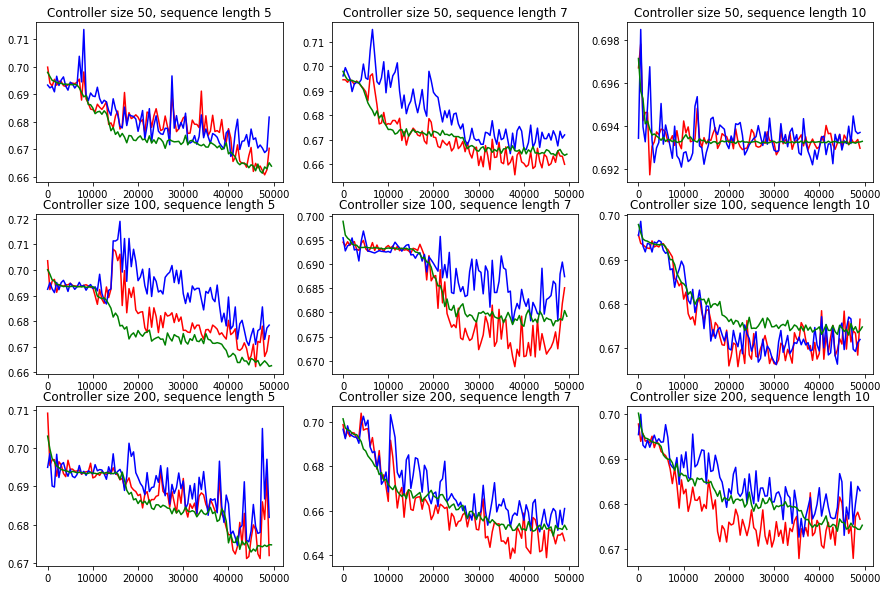

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
i=1  
for c_i, controller_size in enumerate([50,100,200]):
    for s_i, seq_len in enumerate([5,7,10]):
        plt.subplot(3,3,i)
        i+=1
        #print((c_i+1)*(s_i+1))
        x = np.arange(0,50000,500)

        try:
            plt.plot(x[:99],df[(controller_size, seq_len)]['test_loss'], color='r')
            plt.plot(x[:99],df[(controller_size, seq_len)]['test_loss_big'], color='b')
            plt.plot(x,training_loss_df[(controller_size, seq_len)], color='g')
            plt.title("Controller size {}, sequence length {}".format(controller_size, seq_len))
        except Exception as inst:
            print('error', inst)
plt.savefig('joined_plots.png',bbox_inches='tight')
plt.show()